# Project_04 - EDA & HT (Rides)

**Project Descrition**
<br>We will be analyzing datasets provided by Zuber, a new ride-sharing company that's launching in Chicago.
<br>We would like to to understand passenger preferences and the impact of external factors on rides, such as weather.
<br>We will be analyzing datasets about taxi rides from competitors, and test a hypothesis about the impact of weather on ride frequency.

**Step 1-3: Exploratory data analysis (SQL)**
<br>A database with info on taxi rides in Chicago
<br>The resulting dataset will be used in Step 5. (project_sql_result_07.csv)

**Step 4. Exploratory data analysis (Python)**
<br>.company_name: taxi company name
<br>.trips_amount: the number of rides for each taxi company on November 15-16, 2017.
<br>.dropoff_location_name: Chicago neighborhoods where rides ended
<br>.average_trips: the average number of rides that ended in each neighborhood in November 2017.

.import the files, perform EDA, check data types
<br>.identify the top 10 neighborhoods in terms of drop-offs
<br>.make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
<br>.draw conclusions based on each graph and explain the results

**Step 5. Testing hypotheses (Python)**
<br>It contains data on rides from the Loop to O'Hare International Airport. 
<br>Test the hypothesis:
<br>"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
<br>Decide where to set the significance level (alpha)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [10]:
companies = pd.read_csv('datasets/project_01_dataset_1.csv')
do_locations = pd.read_csv('datasets/project_01_dataset_2.csv')
ohare_trip = pd.read_csv('datasets/project_01_dataset_3.csv', parse_dates=['start_ts'])

In [11]:
#companies.to_csv('~/work/project_datasets/project_01_dataset_1.csv', index=False, header=list(companies.columns))
#do_locations.to_csv('~/work/project_datasets/project_01_dataset_2.csv', index=False, header=list(do_locations.columns))
#ohare_trip.to_csv('~/work/project_datasets/project_01_dataset_3.csv', index=False, header=list(ohare_trip.columns))

Corrected the datatype of [start_ts] column from object to datetime64[ns]

In [12]:
display(companies.head())
companies.info()
display(companies.duplicated().sum())

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


0

The datatypes look correct and there are no duplicated rows.

In [13]:
display(do_locations.head())
do_locations.info()
display(do_locations.duplicated().sum())

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


0

The datatypes look correct and there are no duplicated rows.

In [14]:
display(ohare_trip.head())
ohare_trip.info()
display(ohare_trip.duplicated().sum())
ohare_trip.drop_duplicates(inplace=True)
display(ohare_trip.duplicated().sum())

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


197

0

The datatypes look correct. There were 197 fully duplicated rows, so I removed them from the dataset.

**Q. identify the top 10 neighborhoods in terms of drop-offs
<br>make graph: top 10 neighborhoods by number of dropoffs**

(94, 2)

,dropoff_location_name,average_trips,drop-off_percentage
0,Loop,10727.466667,0.190218
1,River North,9523.666667,0.168872
2,Streeterville,6664.666667,0.118177
3,West Loop,5163.666667,0.091561
4,O'Hare,2546.900000,0.045161
5,Lake View,2420.966667,0.042928
6,Grant Park,2068.533333,0.036679
7,Museum Campus,1510.000000,0.026775
8,Gold Coast,1364.233333,0.024190
9,Sheffield & DePaul,1259.766667,0.022338


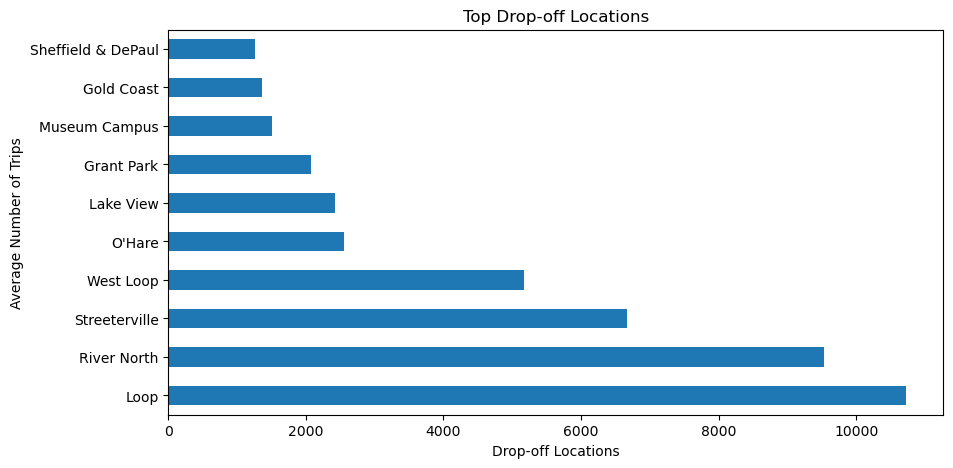

In [15]:
display(do_locations.shape)
top_nh = do_locations.sort_values('average_trips', ascending=False).head(10)
top_nh['drop-off_percentage'] = top_nh['average_trips']/do_locations['average_trips'].sum() * 100
display(top_nh)

top_nh.plot(kind='barh', x='dropoff_location_name', y='average_trips', figsize=[10, 5], title='Top Drop-off Locations', legend=None)
plt.xlabel('Drop-off Locations')
plt.ylabel('Average Number of Trips')
plt.show()

-The top 10 drop-off locations accounted for total of ~77% of all drop-offs during the period.
<br>-With the top drop-off location [Loop] taking 19% of the total drop-offs during the period, which I suspect this is a transit hub of sorts.

**Q. make graph: taxi companies and number of rides**

(64, 2)

,company_name,trips_amount,mkt_share
0,Flash Cab,19558,14.243578
1,Taxi Affiliation Services,11422,8.318343
2,Medallion Leasing,10367,7.550014
3,Yellow Cab,9888,7.201171
4,Taxi Affiliation Service Yellow,9299,6.772218
5,Chicago Carriage Cab Corp,9181,6.686282
6,City Service,8448,6.152457
7,Sun Taxi,7701,5.608436
8,Star North Management LLC,7455,5.429281
9,Blue Ribbon Taxi Association Inc.,5953,4.335414


72.29719396115388

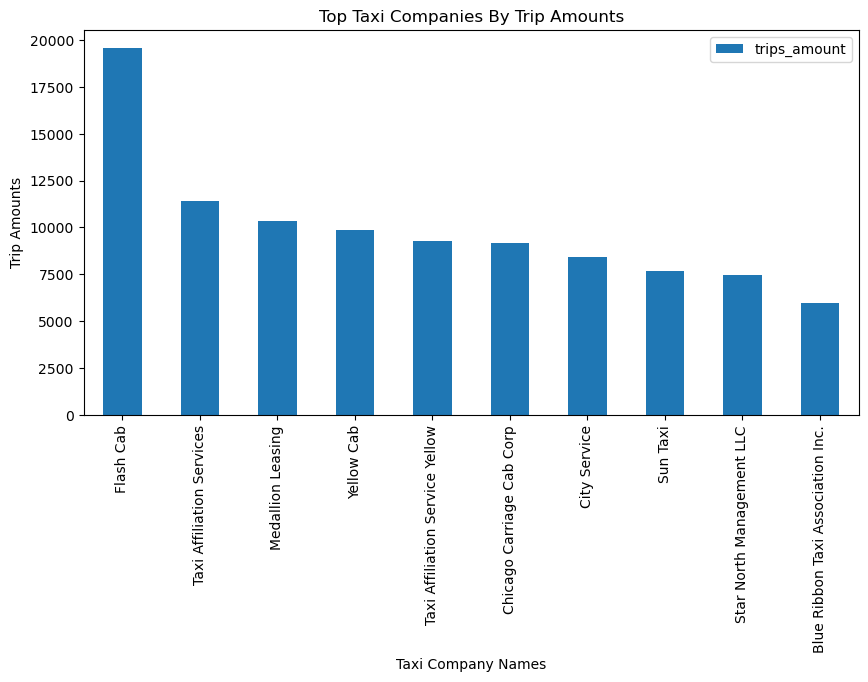

In [16]:
display(companies.shape)
companies['mkt_share'] = companies['trips_amount'] / companies['trips_amount'].sum() * 100
top_companies = companies.sort_values('trips_amount', ascending=False).head(10)
display(top_companies, top_companies['mkt_share'].sum())

top_companies.plot(kind='bar', x='company_name', y='trips_amount', figsize=[10, 5], title='Top Taxi Companies By Trip Amounts')
plt.xlabel('Taxi Company Names')
plt.ylabel('Trip Amounts')
plt.show()

-I added the [mkt_share] column to the dataset to see the ride distribution among taxi companies.
<br>-I only visualized the top 10 taxi companies as there are too many of them to visualize at once. (out of 64 companies)
<br>-The top 10 taxi companies accounted for total of ~72% of all rides during the period.
<br>With market leader [Flash Cab] taking 14% of the rides during the period.

**Q. Test the following hypotheses:**
<br>"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

-I chose an alpha(significance level) 0.05 as this is the most commonly accepted significance level.
<br>-The null hypothesis chosen here is that "The average duration of rides from the Loop to O'Hare International Airport doesn't change on rainy Saturdays."
<br>-The alternative hypothesis is that "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
<br>-Mostly, the null hypothesis states that there is no statistically significant difference between the means of the two datasets, while the alternative hypothesis states that there is a statistically significant difference between the means of the two datasets.

In [17]:
display(ohare_trip.shape)
rainy_days = ohare_trip[ohare_trip['weather_conditions']=='Bad']['duration_seconds']
normal_days = ohare_trip[ohare_trip['weather_conditions']=='Good']['duration_seconds']
display(rainy_days.sort_values(ascending=False).head(3))
display(normal_days.sort_values(ascending=False).head(3))

(871, 3)

276    4980.0
110    4044.0
788    3779.0
Name: duration_seconds, dtype: float64

354    7440.0
619    6420.0
583    4980.0
Name: duration_seconds, dtype: float64

148

723

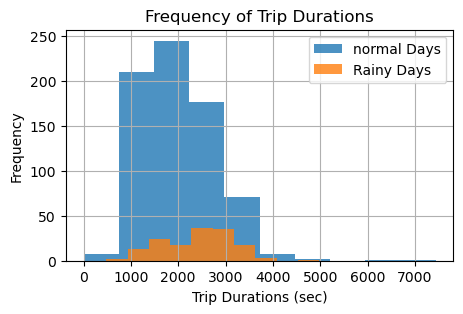

In [23]:
display(len(rainy_days))
display(len(normal_days))

plt.figure(figsize=(5, 3))
normal_days.hist(bins=10, alpha=0.8, label='normal Days')
rainy_days.hist(bins=10, alpha=0.8, label='Rainy Days')
plt.title('Frequency of Trip Durations')
plt.xlabel('Trip Durations (sec)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

-It would seem that there are a lot less trips during rainy days and the trip durations are shorter.
<br>-One possible cause could be people's reluctance to travel during rainy days, and as a result, less traffic around the airport.

In [19]:
display(rainy_days.var())
display(normal_days.var())
alpha = 0.05

results = st.ttest_ind(rainy_days, normal_days, equal_var=False)
display(f'p-alue: {results.pvalue}')

if results.pvalue < 0.05:
    print("We reject the null hypothesis. The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.")
else:
    print("We can't reject the null hypothesis. The average duration of rides from the Loop to O'Hare International Airport doesn't change on rainy Saturdays.")

564819.4434638721

598216.9510810219

'p-alue: 9.126383933880083e-08'

We reject the null hypothesis. The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.


-I set the [equal_var] parameter as False, as the data sizes and variances differ between the datasets.
<br>-We rejected the null hypothesis, as there is statistically significant difference between the average duration of rides from the Loop to O'Hare International Airport on rainy days and normal days.

## Conclusions

After analyzing datasets provided by Zuber, a new ride-sharing company that's launching in Chicago,
<br>the following are some insights about the competitors and passenger preferences and the impact of weather on rides.
<br>-The top 10 drop-off locations accounted for a total of ~77% of all drop-offs during the period.
<br>. With the top drop-off location [Loop] taking 19% of the total drop-offs during the period, which I suspect this is a transit hub of sorts.
<br>-The top 10 taxi companies accounted for total of ~72% of all rides during the period.
<br>. With market leader [Flash Cab] taking 14% of the total rides during the period.
<br>-There is statistically significant difference between rainy days and normal days for the average duration of rides from the Loop to O'Hare International Airport.
<br>. It would seem that there are a lot less trips during rainy days and the trip durations are shorter.
<br>. One possible cause could be people's reluctance to travel during rainy days, and as a result, less traffic around the airport.